In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
columns = df.columns
print("columns: ",columns)

columns:  Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#make the feature and output separation from dataframe
output = df[columns[-1]]
features = df.drop(columns=columns[-1])

In [ ]:
checkNull_entries = df.isnull().sum()
list(checkNull_entries)

if checkNull_entries.any() == False:
    print("No Null entry here in the dataset")
else:
    print("It Contain Null entry/entries need to remove it")
    df.dropna(axis=0,how='any')

No Null entry here in the dataset


In [ ]:
#if any duplicate row exist, this will remove all the duplicate row but keep the first row
df.drop_duplicates(subset=None, 
                          keep='first',
                          inplace=False,
                          ignore_index=False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


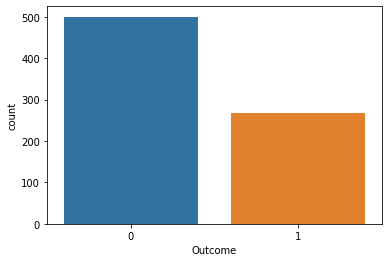

In [ ]:
sns.countplot(df.Outcome,data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


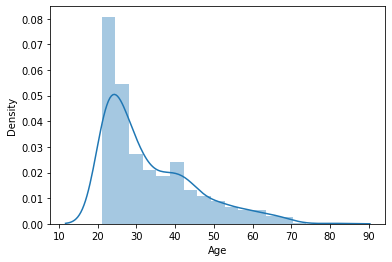

In [ ]:
sns.distplot(df['Age'],kde=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


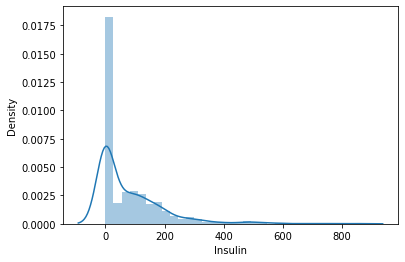

In [ ]:
sns.distplot(df['Insulin'],kde=True)
plt.show()

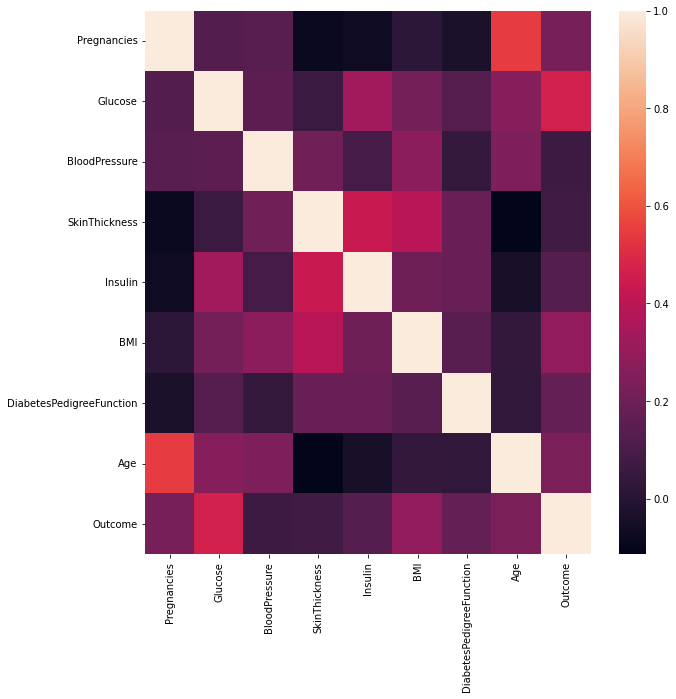

In [ ]:
correlation_df = df.corr()
plt.figure(figsize = (10,10))
sns.heatmap(correlation_df)

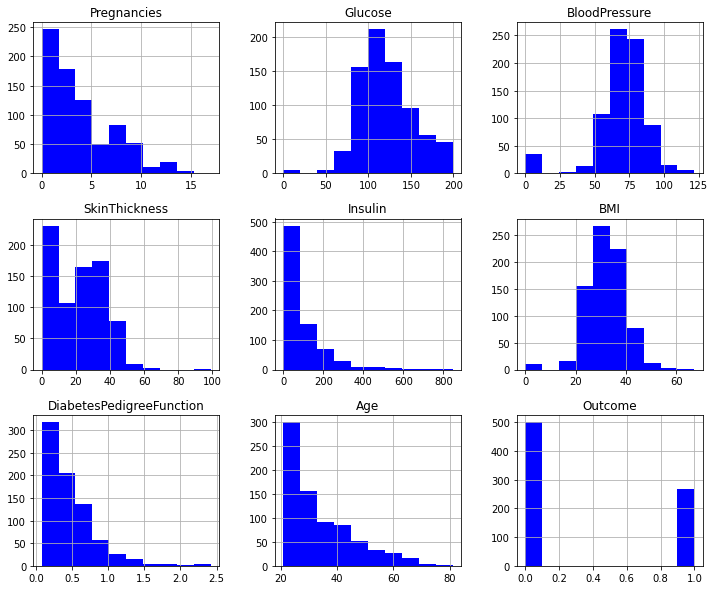

In [ ]:
df.hist(figsize = (12,10),color = 'blue')
plt.show()

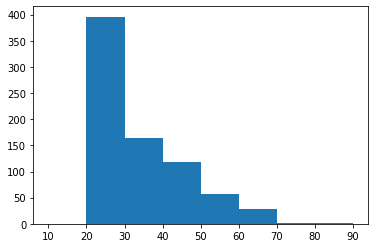

In [ ]:
plt.hist(df['Age'],bins = [10,20,30,40,50,60,70,80,90])
plt.show()

In [ ]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


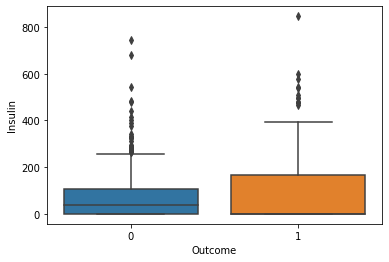

In [ ]:
sns.boxplot(x='Outcome',y='Insulin',data=df)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
output_classes = len(output.unique())
print(output_classes)
X = features.values
y = output.values

print(X.shape)
print(y.shape)


2
(768, 8)
(768,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.30)

print("Orginal shape of X: ", X.shape)
print("Orginal shape of y: ", y.shape)
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

Orginal shape of X:  (768, 8)
Orginal shape of y:  (768,)
shape of X_train:  (537, 8)
shape of X_test:  (231, 8)
shape of y_train:  (537,)
shape of y_test:  (231,)


In [ ]:
print("Categorical conversion of y_train & y_test")
y_train = to_categorical(y_train, num_classes = output_classes, dtype ="uint8")
Y_test = to_categorical(y_test,num_classes = output_classes, dtype ="uint8")


Categorical conversion of y_train & y_test


In [ ]:
#Model creation, compilation, and training
model = Sequential()
model.add(Dense(units=18, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))

model.add(Dense(units=output_classes, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=300, batch_size=32)


Epoch 1/300
17/17 [==============================] - 1s 2ms/step - loss: 35.8022 - accuracy: 0.6667
Epoch 2/300
17/17 [==============================] - 0s 2ms/step - loss: 25.1196 - accuracy: 0.6667
Epoch 3/300
17/17 [==============================] - 0s 2ms/step - loss: 17.9895 - accuracy: 0.6667
Epoch 4/300
17/17 [==============================] - 0s 2ms/step - loss: 12.7403 - accuracy: 0.6667
Epoch 5/300
17/17 [==============================] - 0s 2ms/step - loss: 8.5842 - accuracy: 0.6667
Epoch 6/300
17/17 [==============================] - 0s 2ms/step - loss: 5.6290 - accuracy: 0.6667
Epoch 7/300
17/17 [==============================] - 0s 2ms/step - loss: 3.5845 - accuracy: 0.6629
Epoch 8/300
17/17 [==============================] - 0s 2ms/step - loss: 2.4725 - accuracy: 0.6462
Epoch 9/300
17/17 [==============================] - 0s 2ms/step - loss: 1.8007 - accuracy: 0.6127
Epoch 10/300
17/17 [==============================] - 0s 2ms/step - loss: 1.3341 - accuracy: 0.5885
Epoch

In [ ]:
loss_and_metrics = model.evaluate(X_test, 
                                  Y_test, 
                                  batch_size=128)

2/2 [==============================] - 0s 6ms/step - loss: 0.6063 - accuracy: 0.6494


In [ ]:
classes = model.predict(X_test, batch_size=128)
y_hat = np.max (classes,axis=1)
y_hat = np.where(y_hat<0.5,0,1)
y_test = y_test.reshape(-1)

print(y_test[:5])
print(y_hat[:5])

[0 1 0 0 1]
[1 1 1 1 1]
